 Import Library

In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

 Get Dataset

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Patch Dataset

In [127]:
import os
data_dir = '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/'
IMAGE_SIZE = [224, 224]
train='/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/'
val='/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=32)

Found 312 files belonging to 26 classes.
Using 250 files for training.
Found 312 files belonging to 26 classes.
Using 62 files for validation.


Imagenet weights

In [103]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [104]:
for layer in vgg16.layers:
    layer.trainable = False

Getting number of output classes

In [105]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/*/')
folders

['/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/R/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/X/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/Z/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/V/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/U/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/Q/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/Y/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/T/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/S/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/W/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/I/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/L/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/J/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/O/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/H/',
 '/content/drive/MyDrive/Colab Notebooks/Citra BISINDO/P/',
 '/content/drive/MyDrive/Colab Notebooks

 Create a model

In [106]:
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Model Compile

In [107]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Set up Generator

In [108]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 312 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


Model Fit

In [109]:
history=model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/5
10/10 [==============================] - 339s 35s/step - loss: 3.3025 - accuracy: 0.2500 - val_loss: 1.3681 - val_accuracy: 0.6186
Epoch 2/5
10/10 [==============================] - 336s 35s/step - loss: 1.0446 - accuracy: 0.7692 - val_loss: 0.4764 - val_accuracy: 0.9135
Epoch 3/5
10/10 [==============================] - 337s 35s/step - loss: 0.3869 - accuracy: 0.9135 - val_loss: 0.1450 - val_accuracy: 0.9872
Epoch 4/5
10/10 [==============================] - 337s 35s/step - loss: 0.1696 - accuracy: 0.9808 - val_loss: 0.0709 - val_accuracy: 0.9968
Epoch 5/5
10/10 [==============================] - 337s 35s/step - loss: 0.0707 - accuracy: 0.9968 - val_loss: 0.0316 - val_accuracy: 1.0000


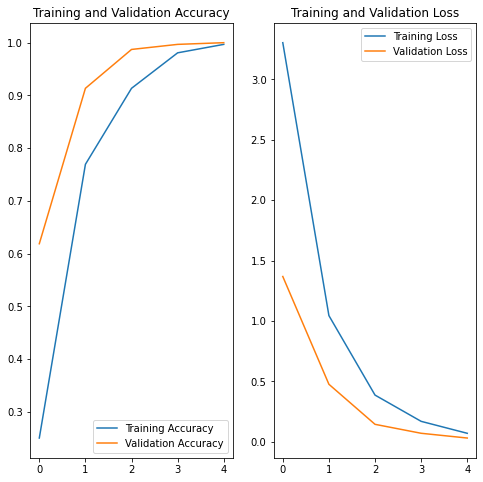

In [120]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Prediction

In [128]:
from google.colab import files
from keras.preprocessing import image

class_names = tuple(train_ds.class_names)
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} \nWith a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Saving body white (2).jpg to body white (2).jpg
This image most likely belongs to K 
With a 9.81 percent confidence.
